In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread, imshow


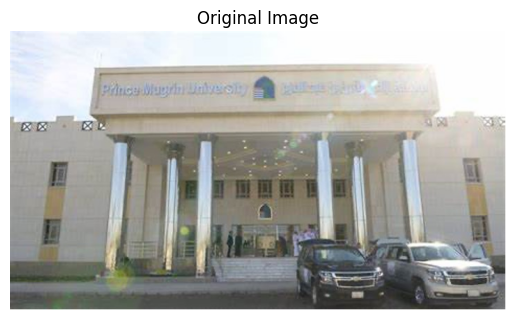

In [3]:
image = imread('Picture1.jpg')
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()


In [5]:
gray_image = rgb2gray(image)
f_image = np.fft.fft2(gray_image)


In [6]:
fshift = np.fft.fftshift(f_image)

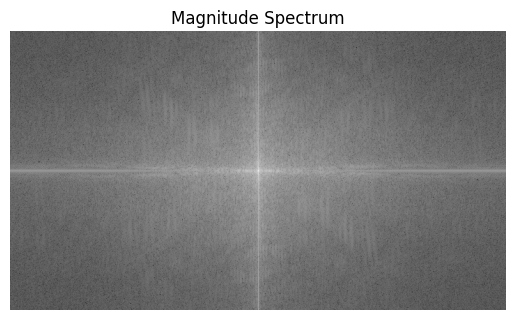

In [7]:
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()


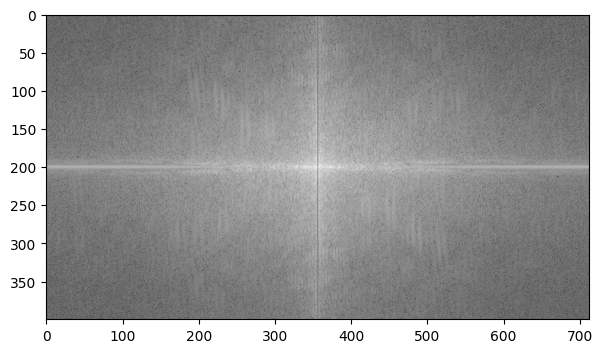

In [8]:
image_gray_fft2 = fshift.copy()
image_gray_fft2[:286, fshift.shape[1]//2] = 1
image_gray_fft2[-286:, fshift.shape[1]//2] = 1

plt.figure(figsize=(7,7))
plt.imshow(np.log(abs(image_gray_fft2)), cmap='gray');


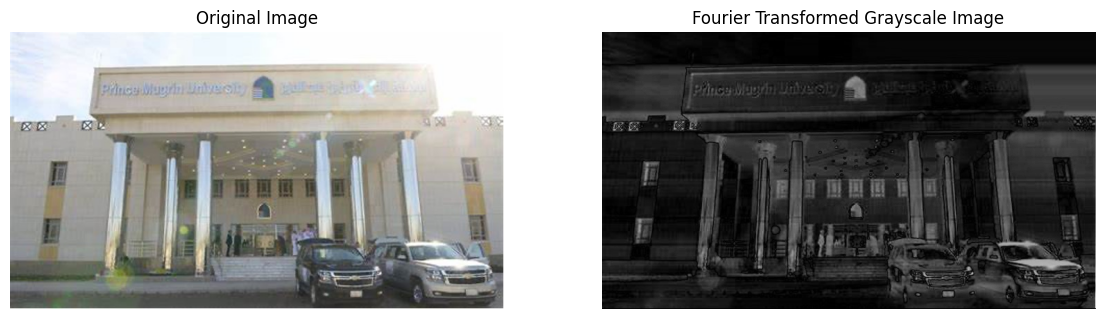

In [9]:
# Use Inverse Fourier Transform
inv_fshift = np.fft.ifftshift(image_gray_fft2)
filtered_gray_image = np.fft.ifft2(inv_fshift)
filtered_gray_image = np.abs(filtered_gray_image)

# Plot the original and fourier-transformed grayscale image
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(filtered_gray_image, cmap='gray')
ax[1].set_title('Fourier Transformed Grayscale Image')
ax[1].axis('off')

plt.show()


In [10]:
transformed_channels = []
for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
    rgb_fft2 = rgb_fft.copy()
    
    # Use the same filters as the grayscale image, just change the variables
    rgb_fft2[:286, rgb_fft.shape[1]//2] = 1
    rgb_fft2[-286:, rgb_fft.shape[1]//2] = 1
    transformed_channels.append(abs(np.fft.ifft2(np.fft.ifftshift(rgb_fft2))))


In [11]:
filtered_rgb_image = np.dstack([transformed_channels[0], transformed_channels[1], transformed_channels[2]])
filtered_rgb_image = np.clip(filtered_rgb_image, 0, 255).astype(np.uint8)


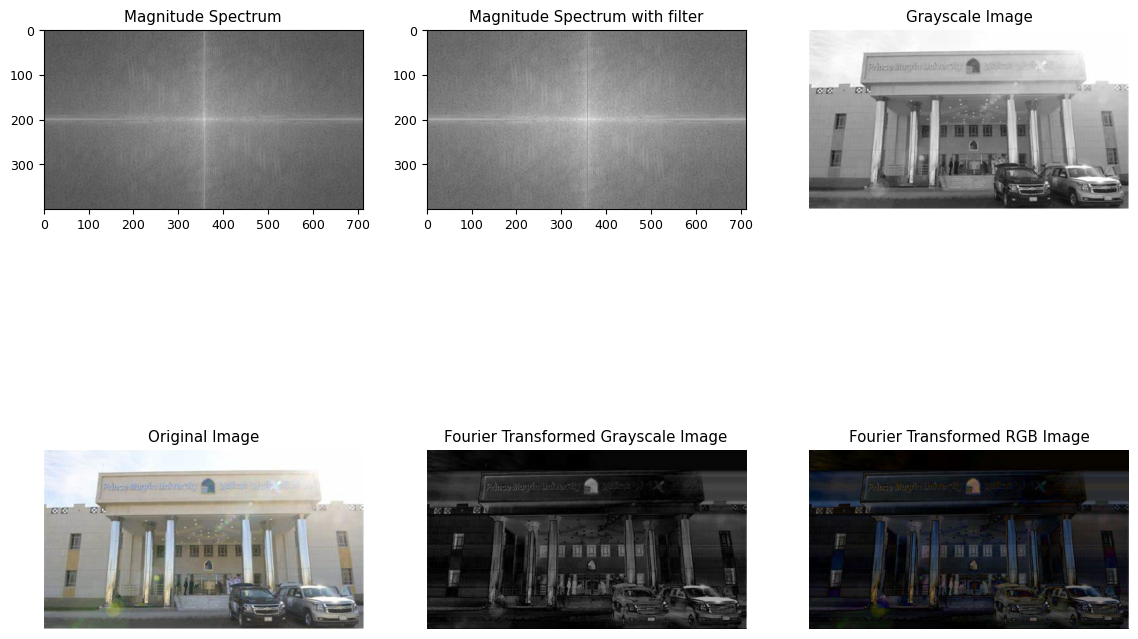

In [22]:
def plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image):
    
    if len(image.shape) == 2:
        image = np.stack((image, image, image), axis=-1)

    # Convert the image to grayscale
    gray_image = rgb2gray(image[:,:,:3])
    
    # Calculate the 2D Fourier transform and shift the zero-frequency components to the center
    f_image = np.fft.fft2(gray_image)
    fshift = np.fft.fftshift(f_image)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Plot the images
    fig, ax = plt.subplots(2, 3, figsize=(14, 10))

    ax[0, 0].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 0].set_title('Magnitude Spectrum')

    ax[0, 1].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 1].imshow(np.log(abs(image_gray_fft2)), cmap='gray')
    ax[0, 1].set_title('Magnitude Spectrum with filter')

    ax[0, 2].imshow(gray_image, cmap='gray')
    ax[0, 2].set_title('Grayscale Image')
    ax[0, 2].set_axis_off()

    ax[1, 0].imshow(image)
    ax[1, 0].set_title('Original Image')
    ax[1, 0].set_axis_off()

    ax[1, 1].imshow(filtered_gray_image, cmap='gray')
    ax[1, 1].set_title('Fourier Transformed Grayscale Image')
    ax[1, 1].set_axis_off()

    ax[1, 2].imshow(filtered_rgb_image)
    ax[1, 2].set_title('Fourier Transformed RGB Image')
    ax[1, 2].set_axis_off()

    # Save the Fourier-transformed RGB image
    plt.savefig('filtered_rgb_image.png', dpi=300)
    plt.show()

plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image)


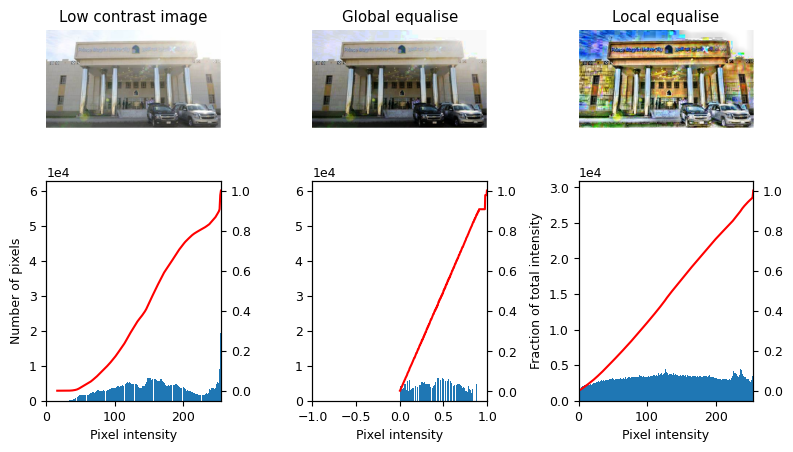

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_ubyte
from skimage.morphology import disk, ball
from skimage.filters import rank
from skimage.io import imread

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    
    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)
    
    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf

# Load the image correctly
img = imread('Picture1.jpg')

# Convert the image to uint8 if necessary
if img.dtype != np.uint8:
    img = img_as_ubyte(img)

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
if img.ndim == 2:
    footprint = disk(30)
elif img.ndim == 3:
    footprint = ball(30)
else:
    raise ValueError('Unsupported image dimensions')

img_eq = rank.equalize(img, footprint=footprint)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalise')

ax_hist.set_ylabel('Fraction of total intensity')

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

### report:
i just copy and paste what you have done in the lab, i did not do anything new and then i change the image to the one i have in my directory.
the image is a bit different from the one you have in the lab, but the results are the same.